In [1]:
!pip install modelbit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4

In [1]:
import modelbit
mb = modelbit.login()

In [3]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/moezali1/modelbit/main/loans.csv')

<Axes: xlabel='Default'>

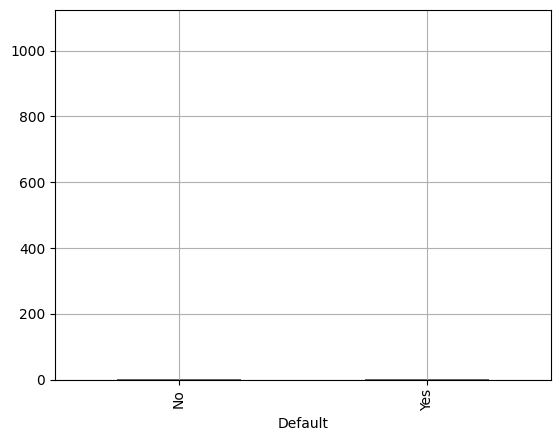

In [4]:
data.head()
data.isnull().sum()
data['Default'].value_counts(normalize=True).plot.bar()
data['Age'].hist(bins=25)
data['Loan_Amount_Requested'].hist(bins=25)

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer

In [6]:
X = data.drop(columns=['Default', 'Applicant_ID'])
y = data['Default']

In [7]:
numeric_features = ['Annual_Income', 'Credit_Score', 'Employment_Years','Loan_Amount_Requested']

In [8]:
categorical_features = ['Age']

In [9]:
numeric_transformer = Pipeline(steps=[
('imputer', SimpleImputer(strategy='median')),
('scaler', MinMaxScaler())
])

In [10]:
categorical_transformer = Pipeline(steps=[
('bin', KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='quantile')),
('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [11]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [12]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Annual_Income',
                                                   'Credit_Score',
                                                   'Employment_Years',
                                                   'Loan_Amount_Requested']),
                                                 ('cat',
                                                  Pipeline(steps=[('bin',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    n_bins=6)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Age'])])),
                ('classifier', LogisticRegression())])

In [13]:
from sklearn.model_selection import train_test_split
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)

In [14]:

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (3500, 5)
X_test: (1500, 5)
y_train: (3500,)
y_test: (1500,)


In [15]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Annual_Income',
                                                   'Credit_Score',
                                                   'Employment_Years',
                                                   'Loan_Amount_Requested']),
                                                 ('cat',
                                                  Pipeline(steps=[('bin',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    n_bins=6)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Age'])])),
                ('classifier', LogisticRegression())])

In [16]:
y_pred = pipeline.predict(X_test)
y_pred

array(['No', 'Yes', 'Yes', ..., 'No', 'Yes', 'Yes'], dtype=object)

In [17]:

y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
y_pred_prob

array([6.74126499e-05, 9.02999784e-01, 9.96170016e-01, ...,
       2.40077534e-02, 8.04457516e-01, 9.78866243e-01])

In [18]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9606666666666667